In [2]:
from las import LASReader
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline

In [3]:
f = 'E-38.las'
well = LASReader(f , null_subs=np.nan)

In [4]:
data = well.data2d
data[8000:8003]

array([[  1.23931680e+03,   1.58980000e+00,   3.63258500e+02,
          7.25742000e+01,   7.80067000e+01,   7.85480000e+01,
          7.70730000e+01,   2.21016200e+02,   4.31449510e+03,
         -6.19000000e-02,  -2.45000000e-02,  -2.45000000e-02,
          1.85809000e+01,   2.15745300e+02,   1.03339800e+02,
          2.48608000e+02,   2.25353300e+02,   2.30556200e+02,
          1.86506700e+02,   3.62429000e+01,   2.49800000e-01,
          2.49800000e-01,   5.01320000e+00,   9.46510000e+00,
          2.75208370e+03,   2.69044560e+03,   7.89752000e+01,
          4.90684000e+01,  -6.46562500e+02,   9.28000000e-02,
          2.52100000e+03,   2.80000000e+01],
       [  1.23946920e+03,   1.58970000e+00,   4.12222300e+02,
          8.01479000e+01,   8.53041000e+01,   8.48946000e+01,
          8.33492000e+01,   2.20509800e+02,   4.22593990e+03,
         -7.05000000e-02,  -2.62000000e-02,  -2.62000000e-02,
          2.47680000e+01,   2.14225800e+02,   1.01429100e+02,
          2.45409500e+02,

In [5]:
depth = data[:,0]
depth[:10]

array([ 20.1168,  20.2692,  20.4216,  20.574 ,  20.7264,  20.8788,
        21.0312,  21.1836,  21.336 ,  21.4884])

In [6]:
well.curves.display()

DEPT (M)         ''                             [1 DEPTH (BOREHOLE) {F10.4}]
AMF (OHMM)       ''                             [2 Array Induction Mud Resistivity Fully Calibrated {F13.4}]
AT10 (OHMM)      ''                             [3 Array Induction Two Foot Resistivity A10 {F13.4}]
AT20 (OHMM)      ''                             [4 Array Induction Two Foot Resistivity A20 {F13.4}]
AT30 (OHMM)      ''                             [5 Array Induction Two Foot Resistivity A30 {F13.4}]
AT60 (OHMM)      ''                             [6 Array Induction Two Foot Resistivity A60 {F13.4}]
AT90 (OHMM)      ''                             [7 Array Induction Two Foot Resistivity A90 {F13.4}]
CALI (MM)        ''                             [8 Caliper {F13.4}]
CDF (N)          ''                             [9 Calibrated Downhole Force {F13.4}]
DPHI (V/V)       ''                             [10 Density Porosity {F13.4}]
DPHI_SAN (V/V)   ''                             [11 Density Porosity (matrix 

In [7]:
well.start, well.stop

(20.1168, 1729.8924)

Extract the gamma-ray log.

In [8]:
gr = np.vstack((data[:,0], data[:,14])).T
print gr
gr.shape

[[   20.1168        nan]
 [   20.2692        nan]
 [   20.4216        nan]
 ..., 
 [ 1729.5876        nan]
 [ 1729.74          nan]
 [ 1729.8924        nan]]


(11220, 2)

Discard all the nans.

In [9]:
gr = gr[~np.isnan(gr[:,1])]
print gr

[[  304.3428    54.2195]
 [  304.4952    54.8475]
 [  304.6476    52.3608]
 ..., 
 [ 1495.044     45.4073]
 [ 1495.1964    45.4073]
 [ 1495.3488    45.4073]]


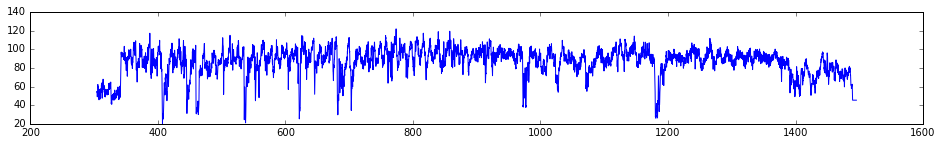

In [10]:
fig = plt.figure(figsize=(16,2))
plt.plot(gr[:,0], gr[:,1])
plt.show()

In [11]:
d = gr[:,0]
g = gr[:,1]
binno = 31
norm = binno * (g-np.amin(g))/(np.amax(g)-np.amin(g))
bins = np.arange(binno)
dig = np.digitize(norm, bins, right=True)
np.amax(dig), np.amin(dig)

(31, 0)

In [12]:
def bin_curve(c, nbins):
    bins = np.linspace(np.amin(g), np.amax(g), nbins)
    return np.digitize(c, bins, right=True)

In [13]:
np.arange(np.amin(g), np.amax(g), 31)

array([  20.3574,   51.3574,   82.3574,  113.3574])

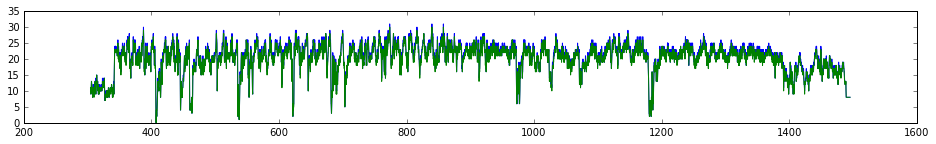

In [14]:
fig = plt.figure(figsize=(16,2))
plt.plot(d, dig)
plt.plot(d, bin_curve(g, 31))
plt.show()

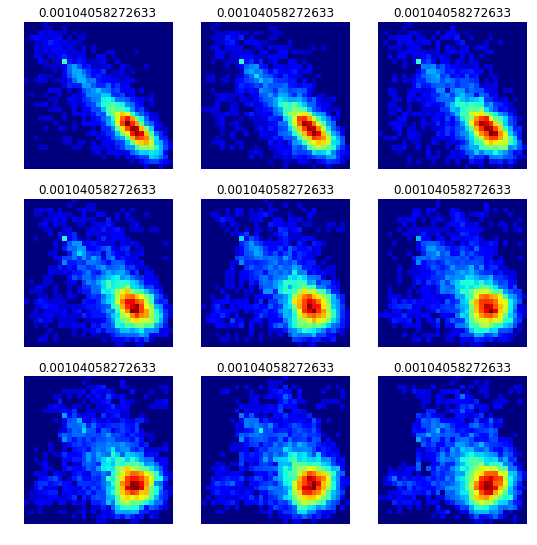

In [41]:
plt.figure(figsize=(9,9))

for p in range(9):
    p += 1
    glcm = np.zeros((binno,binno))

    for i,v in enumerate(dig):
        try:
            glcm[v, dig[i + 4*p]] += 1
        except:
            continue
            
    glcm /= np.sum(glcm)
    plt.subplot(3,3,p)
    plt.axis('off')
    plt.title(np.mean(glcm))
    plt.imshow(np.sqrt(glcm), interpolation='nearest')
    
plt.show()

Mahotas averages the GLCM across directions. Let's try averaging across scale, then we'll try direction. 

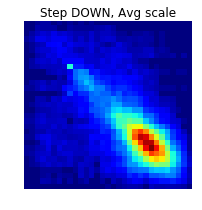

First 4 grey values in GLCM...
[[  0.00000000e+00   0.00000000e+00   1.42486677e-05   2.84973355e-05]
 [  0.00000000e+00   0.00000000e+00   4.27460032e-05   2.84973355e-05]
 [  0.00000000e+00   2.84973355e-05   8.54920065e-05   1.56735345e-04]
 [  1.42486677e-05   5.69946710e-05   2.27978684e-04   2.42227352e-04]]


In [16]:
plt.figure(figsize=(3,3))

glcm = np.zeros((binno,binno))

for p in range(9):
    p += 1
    for i,v in enumerate(dig):
        try:
            glcm[v,dig[i + 2*p]] += 1
        except:
            continue

glcm /= np.sum(glcm)
            
plt.axis('off')
plt.title('Step DOWN, Avg scale')
plt.imshow(np.sqrt(glcm), interpolation='nearest')
    
plt.show()

print "First 4 grey values in GLCM..."
print glcm[:4,:4]

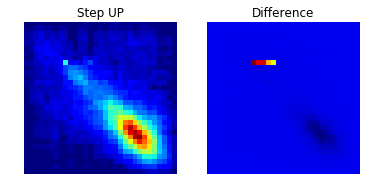

In [17]:
plt.figure(figsize=(6,3))

glcm_down = np.zeros((binno,binno))

for p in range(9):
    p += 1
    for i,v in enumerate(dig):
        try:
            glcm_down[v,dig[i - 2*p]] += 1
        except:
            continue

glcm_down /= np.sum(glcm_down)
            
plt.subplot(1,2,1)
plt.axis('off')
plt.title('Step UP')
plt.imshow(np.sqrt(glcm_down), interpolation='nearest')
plt.subplot(1,2,2)
plt.axis('off')
plt.title('Difference')
plt.imshow(glcm_down.T - glcm, interpolation='nearest')
    
plt.show()

Maybe not surprising, but the matrix for comparing UP in the log seems to be exactly the same as the transpose of comparing DOWN. I don't know what that strange series of non-zero samples is...

We really want to compute the GLCM for a moving kernel, rather than the whole log. Let's do 100 samples at a time.

In [47]:
def glcm(c, scales):

    # Number of non-zero gray-levels.
    n = len(np.unique(c)) - 1
    
    # Empty GLCM.
    stat = np.zeros_like(c, dtype=float)
    
    # Build it up.
    for i in np.arange(c.size - 50):
        i += 50
        glcm = np.zeros((n, n))
        for p in range(*scales):
            for j, v in enumerate(c[i-49:i+50]):
                j += i
                try:
                    glcm[v, c[j + 4*p]] += 1
                except:
                    print ".",
                    continue
        stat[i] = np.var(glcm)

    return stat

In [45]:
np.arange(5,6)

array([5])

In [19]:
subdig = dig[2000:5000]

%timeit glcm(subdig)

1 loops, best of 3: 3.08 s per loop


In [48]:
stat = glcm(subdig, (9,10))

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

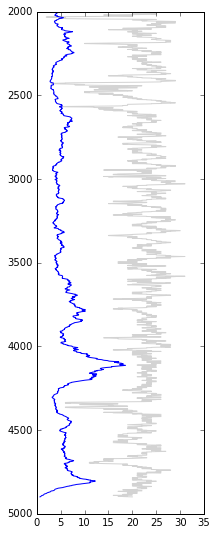

In [51]:
plt.figure(figsize=(3,9))
depths = np.arange(2000,4900)
plt.plot(subdig[50:-50], depths, 'lightgray')
plt.plot(20*stat[50:-50], depths)
plt.gca().invert_yaxis()
plt.show()

In [40]:
from numba import jit

In [39]:
subdig = dig[2000:5000]
scales = 24

stat = np.zeros((subdig.size,scales), dtype=float)

for i in np.arange(subdig.size - 100):
    
    i += 50
        
    for p in range(scales):
        glcm = np.zeros((binno,binno))

        for j,v in enumerate(subdig[i-49:i+50]):
            j += i # 'correct' j to dig index
            try:
                glcm[v,subdig[j + 4*p + 1]] += 1
            except:
                continue
                
        stat[i,p] = np.var(glcm)

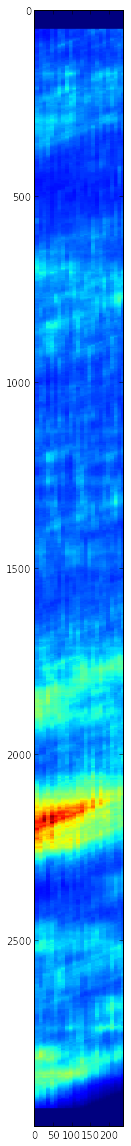

In [27]:
stretch = np.repeat(stat,10,1)
plt.figure(figsize=(2,20))
plt.imshow(stretch)
plt.show()

Now choose the max from each row.

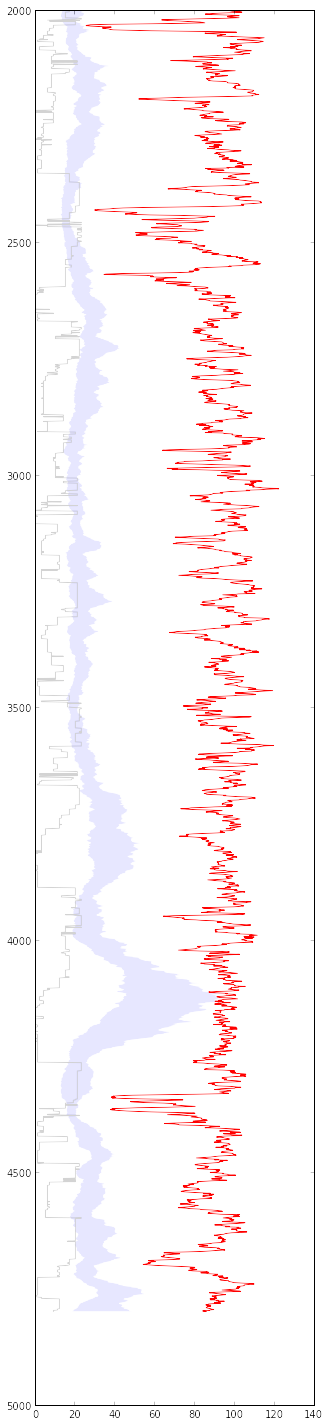

In [28]:
subg = g[2000:5000]
scl = 100
maxvar = np.amax(stat,1)
minvar = np.amin(stat,1)
maxind = np.argmax(stat,1)

plt.figure(figsize=(5,25))
depths = np.arange(2000,4798)
plt.plot(subg[51:-151], depths, 'r')
plt.plot(maxind[51:-151], depths, 'lightgray')
# plt.plot(stat[51:-151,0]*scl, depths, 'r')
# plt.plot(stat[51:-151,23]*scl, depths, 'r')
#plt.plot(maxvar[51:-151]*scl, depths, 'g')
#plt.plot(minvar[51:-151]*scl, depths, 'g')
plt.fill_betweenx(depths, minvar[51:-151]*scl, maxvar[51:-151]*scl, lw=0, alpha=0.3)
plt.gca().invert_yaxis()
plt.show()